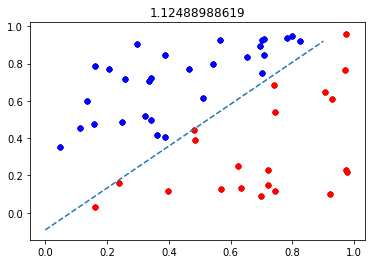

In [163]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)
data = []
#y = x
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
area = 20#(30 * np.random.rand(N))**2  # 0 to 15 point radii
for i in range(len(x)):
    if x[i] > y[i]:
        plt.scatter(x[i], y[i], s=area, c='red', alpha=0.5)
        data.append([x[i], y[i], 1])
    else:
        plt.scatter(x[i], y[i], s=area, c='blue', alpha=0.5)
        data.append([x[i], y[i], 0])

plt.show()

In [164]:
import math
dotandDists = []
size = len(data)
for index1 in range(size):
    index2 = index1 + 1
    for index2 in range(size):
        if data[index1][2] != data[index2][2]:
            x1 = data[index1][0] 
            y1 = data[index1][1]
            x2 = data[index2][0] 
            y2 = data[index2][1]
            if x1 != x2 and y1 != y2:
                dist = math.sqrt((x2 - x1)**2+(y2 - y1)**2)
                dotandDists.append([index1, index2, dist])
dotandDists = np.array(dotandDists)                   
#print(dotandDists)

In [165]:
sortedar = np.sort(dotandDists.view('i8,i8,f8'), order=['f2'], axis=0).view(np.float)
print(sortedar[-1], sortedar[-3], sortedar[-5])

[ 43.          23.           1.11673772] [ 49.          43.           1.10732488] [ 40.          36.           1.10373725]


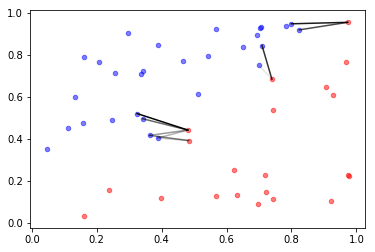

In [166]:
def linedrawer(i, color, alpha):
    ind1 = int(sortedar[i][0])
    ind2 = int(sortedar[i][1])
    dot1 = [data[ind1][0], data[ind1][1]]
    dot2 = [data[ind2][0], data[ind2][1]]
    plt.plot([dot1[0], dot2[0]], [dot1[1], dot2[1]], c=color, alpha=alpha) 
    
for i in range(len(x)):
    if x[i] > y[i]:
        plt.scatter(x[i], y[i], s=area, c='red', alpha=0.5)
        data.append([x[i], y[i], 1])
    else:
        plt.scatter(x[i], y[i], s=area, c='blue', alpha=0.5)
        data.append([x[i], y[i], 0])
ind = 0
alpha = 0.1
while ind < 20:       
    linedrawer(ind, 'black',alpha)
    ind += 2
    alpha += 0.1
plt.show()

1.12488988619 -0.0923515466045


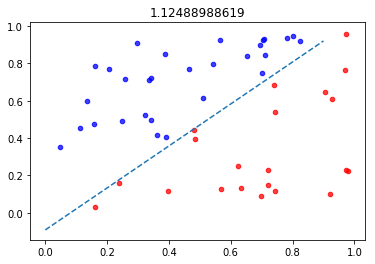

In [167]:
def stealer(i):
    ind1 = int(sortedar[i][0])
    ind2 = int(sortedar[i][1])
    dot1 = [data[ind1][0], data[ind1][1]]
    dot2 = [data[ind2][0], data[ind2][1]]
    x1, y1 = dot1
    x2, y2 = dot2
    x = (x2 + x1) / 2
    y = (y2 + y1) / 2
    return x, y

def extractor(ind1, ind2):
    dotind1 = int(sortedar[-1][0])
    dotind2 = int(sortedar[-1][1])
    x = [data[dotind1][0],data[dotind2][0]]
    y = [data[dotind1][1],data[dotind2][1]]
    x1 = (x[0] + x[1]) / 2
    y1 = (y[0] + y[1]) / 2
    return x1, y1

for i in range(len(data)):
    dot = [data[i][0], data[i][1]]
    claster = data[i][2]
    if claster == 0:
        plt.scatter(dot[0], dot[1], s=area, c='blue', alpha=0.5)
    else:
        plt.scatter(dot[0], dot[1], s=area, c='red', alpha=0.5)
        
x1, y1 = stealer(0)
x2, y2 = stealer(2)

slope, intercept = np.polyfit([x1, x2], [y1, y2], 1)
print(slope, intercept)
x = []
y = []
for xcoor in range(0, 10, 1):
    #y = kx + b
    xc = xcoor/ 10
    x.append(xc)
    ycoor = slope * xc + intercept
    y.append(ycoor)
    
plt.plot(x, y, '--')
plt.title(slope)

plt.show()